### Notebook for Project2 for Programming for Data Analysis

## An analysis of paleo-present climate data

***

## Table of Contents

1. [Introduction](#Introduction)
2. 

### CO2 vs Temperatue Anomaly from 800kyrs - present


---

In [29]:
import pandas as pd

In [30]:
# Read Data

# Need to installxlrd to reaad .xls file
# pip install xlrd

ncei_df = pd.read_excel("https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/antarctica2015co2.xls", sheet_name="CO2 Composite",skiprows = range(1, 15))
gml_df_col_names = ["year", "CO2", 'UNC']
gml_df = pd.read_csv("https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_annmean_mlo.csv",skiprows=44, sep=",", names=gml_df_col_names)

In [31]:
ncei_df

,Composite CO2 record (0-800 kyr BP),Unnamed: 1,Unnamed: 2
0,-51.030000,368.022488,0.060442
1,-48.000000,361.780737,0.370000
2,-46.279272,359.647793,0.098000
3,-44.405642,357.106740,0.159923
4,-43.080000,353.946685,0.043007
...,...,...,...
1896,803925.284376,202.921723,2.064488
1897,804009.870607,207.498645,0.915083
1898,804522.674630,204.861938,1.642851
1899,805132.442334,202.226839,0.689587


In [32]:
gml_df

,year,CO2,UNC
0,1959,315.98,0.12
1,1960,316.91,0.12
2,1961,317.64,0.12
3,1962,318.45,0.12
4,1963,318.99,0.12
...,...,...,...
59,2018,408.72,0.12
60,2019,411.65,0.12
61,2020,414.21,0.12
62,2021,416.41,0.12


In [33]:
#gml_df.describe()

# Change the date to datetime rather than object
from datetime import datetime

#gml_df

# pd.to_datetime(gml_df['year'])
#pd.gml_df['year'] = datetime.strptime(gml_df['year'], '%y')

In [34]:
import seaborn as sns

<Axes: xlabel='year', ylabel='CO2'>

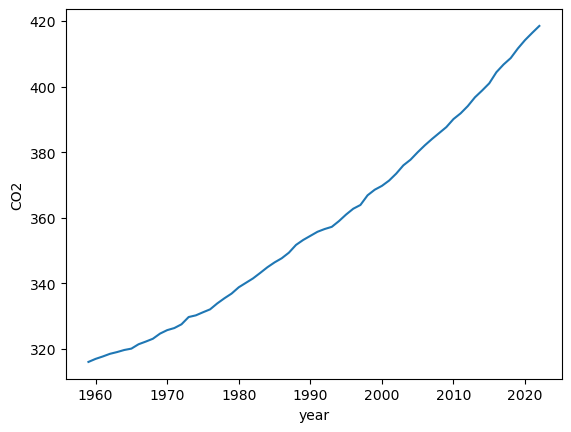

In [35]:
sns.lineplot(data=gml_df, x='year', y='CO2')

### Examine one other feature - CH4 for example



---

### Examine Irish Context



---

### Fuse and analysis of data from various data sources and Export to csv and json



---

### Analysis of all the above data - trends/relationships etc (temporal leads, lags, frequency analysis etc)



---

### Predict global temperature anomaly over next few decades (synthesise data) and compare to pushed climate modles - if atmospheric CO2 trends continue



---

### Comment on accellerated warming based on very latest features (e.g temperature/polar-ice-coverage)



---

### Appendix/References etc

***

#### End

Notes:

In [36]:
# json

# Reading from a json file
'''
import json

FILENAME = "json_text.txt"

with open(FILENAME, 'rt') as f:
    dict = json.load(f)

print (dict["name"], dict ["age"])

print (dict)
'''


# Writing to a json file
'''
import json

FILENAME = "json_text.txt"

dict = {}
dict["name"] = input("Enter a name: ")
dict["age"] = int(input("Enter an age: "))
print (dict)

#1 - assume the file exists
with open(FILENAME, 'wt') as f:
    json.dump(dict, f)
'''

'\nimport json\n\nFILENAME = "json_text.txt"\n\ndict = {}\ndict["name"] = input("Enter a name: ")\ndict["age"] = int(input("Enter an age: "))\nprint (dict)\n\n#1 - assume the file exists\nwith open(FILENAME, \'wt\') as f:\n    json.dump(dict, f)\n'

Data Sources
Link to CO2 data -800000 to present+51 (present is 1950)
https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/antarctica2015co2composite.txt   
Taken from https://www.ncei.noaa.gov/access/paleo-search/study/17975

Link to Mauna Loa data 1959 - 2022
https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_annmean_mlo.csv   
Taken from https://gml.noaa.gov/ccgg/trends/data.html

Link to Temperature data...